# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np


warnings.filterwarnings('ignore')
%matplotlib inline

In [174]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [175]:
data_item = data.groupby("ItemType").agg({"RetailSales":"sum","RetailTransfers":"sum","WarehouseSales":"sum"})
data_item.head()

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72


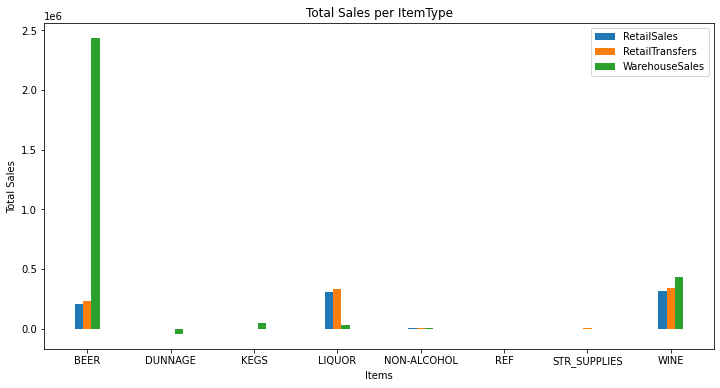

In [176]:
fig, ax = plt.subplots(figsize=(12,6))
x=np.arange(1,len(data_item.index)+1)
width=0.1
ax.bar(x-width,data_item["RetailSales"],width)
ax.bar(x,data_item["RetailTransfers"],width)
ax.bar(x+width,data_item["WarehouseSales"],width)
ax.set_ylabel("Total Sales")
ax.set_xlabel("Items")
tickLabel = [e for e in data_item.index]
labelPos = np.arange(1,len(data_item.index)+1)
plt.xticks(labelPos,tickLabel)
ax.legend(["RetailSales","RetailTransfers", "WarehouseSales"])
plt.title("Total Sales per ItemType")
#plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.show()

#ylim(bottom, top)     # set the ylim to bottom, top

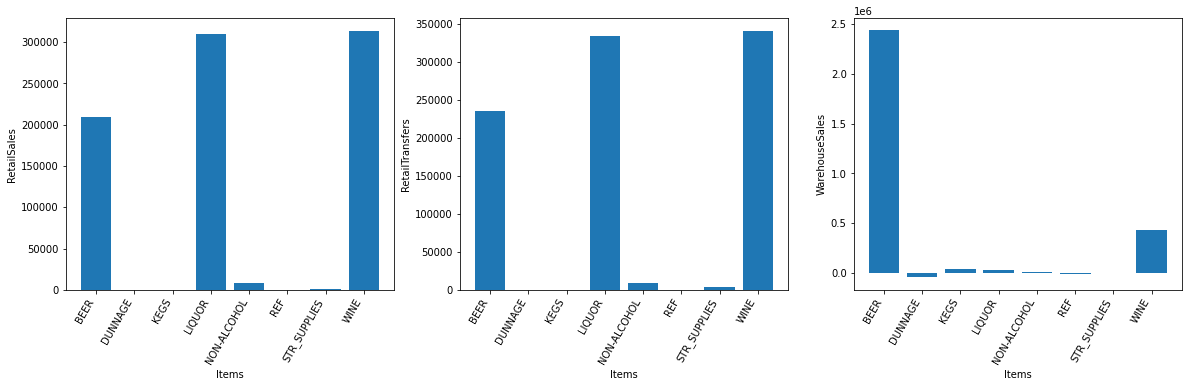

In [177]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.bar(data_item.index,data_item["RetailSales"])
plt.xlabel("Items")
plt.ylabel("RetailSales")
plt.xticks(np.arange(len(data_item.index)), rotation=60,horizontalalignment="right")

plt.subplot(1,3,2)
plt.bar(data_item.index,data_item["RetailTransfers"])
plt.xlabel("Items")
plt.ylabel("RetailTransfers")
plt.xticks(np.arange(len(data_item.index)), rotation=60,horizontalalignment="right")

plt.subplot(1,3,3)
plt.bar(data_item.index,data_item["WarehouseSales"])
plt.xlabel("Items")
plt.ylabel("WarehouseSales")
plt.xticks(np.arange(len(data_item.index)), rotation=60,horizontalalignment="right")

plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [178]:
data_sales = data.groupby("Supplier").agg({"RetailSales":"sum","RetailTransfers":"sum","WarehouseSales":"sum"})
data_sales["TotalSales"] = data_sales["RetailSales"]+data_sales["RetailTransfers"]+data_sales["WarehouseSales"]
data_bestsales = data_sales.sort_values("TotalSales",ascending=False)[:10]
data_bestsales

,RetailSales,RetailTransfers,WarehouseSales,TotalSales
Supplier,,,,
MILLER BREWING COMPANY,35022.63,39176.67,572623.41,646822.71
CROWN IMPORTS,26707.83,29561.67,579824.70,636094.20
ANHEUSER BUSCH INC,42559.14,47322.64,493856.19,583737.97
HEINEKEN USA,20923.17,23004.25,318812.59,362740.01
E & J GALLO WINERY,67455.63,75129.83,75594.99,218180.45
DIAGEO NORTH AMERICA INC,57656.36,62968.12,54252.88,174877.36
CONSTELLATION BRANDS,54472.51,60542.10,44968.76,159983.37
JIM BEAM BRANDS CO,39156.79,43020.59,2928.45,85105.83
THE WINE GROUP,25758.15,28462.05,26603.78,80823.98


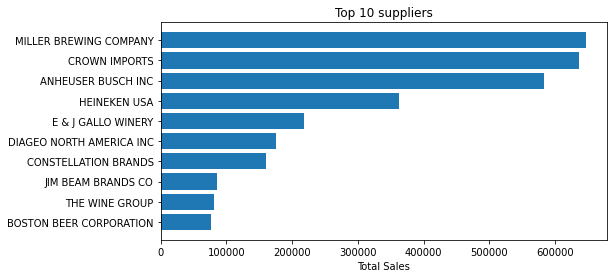

In [181]:
fig, ax = plt.subplots(figsize=(8,4))

suppliers = list(data_bestsales.index)
y_ticks = np.arange(len(suppliers))
values = data_bestsales["TotalSales"]

ax.barh(y_ticks, values, align='center')
ax.set_yticks(y_ticks)
ax.set_yticklabels(suppliers)
ax.invert_yaxis()  # ascending = False
ax.set_xlabel('Total Sales')
ax.set_title('Top 10 suppliers')

plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [211]:
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [212]:
data_meanSales = pd.pivot_table(data=data, values=["RetailSales","RetailTransfers","WarehouseSales"], index=["Year","Month"],aggfunc='mean')
data_meanSales.head()

RetailSales  RetailTransfers  WarehouseSales
Year Month                                              
2017 4         0.000000        15.707503        0.000000
     5         7.038838         7.421817       27.310548
     6         7.143914         6.950396       27.839069
     8         6.409991         6.584726       28.122641
     9         6.757254         6.419721       22.817909

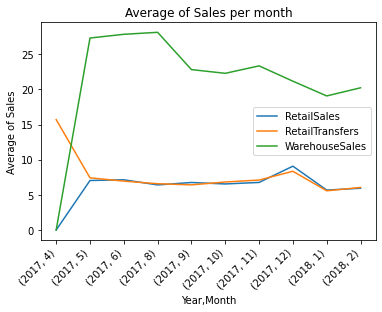

In [213]:
data_meanSales.plot()
tickLabel = data_meanSales.index
labelPos = np.arange(len(data_meanSales.index))
plt.xticks(labelPos,tickLabel, rotation=45, horizontalalignment="right")
plt.ylabel("Average of Sales")
plt.title("Average of Sales per month")
plt.show()

## 4. Plot the same information as above but as a bar chart.

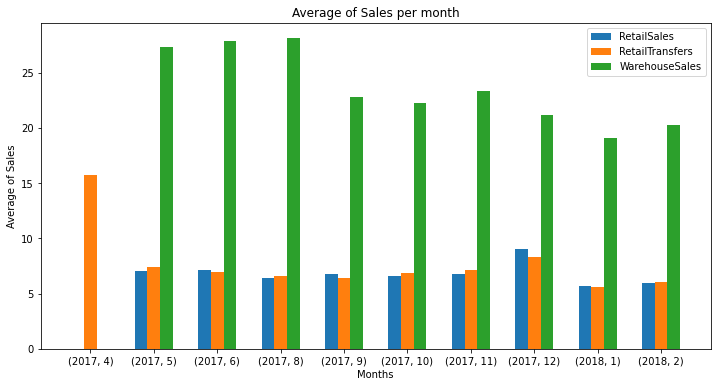

In [210]:
fig, ax = plt.subplots(figsize=(12,6))
x=np.arange(len(data_meanSales.index))
width=0.2
ax.bar(x-width,data_meanSales["RetailSales"],width)
ax.bar(x,data_meanSales["RetailTransfers"],width)
ax.bar(x+width,data_meanSales["WarehouseSales"],width)
ax.set_ylabel("Average of Sales")
ax.set_xlabel("Months")
tickLabel = data_meanSales.index
labelPos = np.arange(len(data_meanSales.index))
plt.xticks(labelPos,tickLabel)
ax.legend(["RetailSales","RetailTransfers", "WarehouseSales"])
plt.title("Average of Sales per month")
plt.show()


## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [222]:
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [223]:
data_monthYear = pd.pivot_table(data=data, values="RetailSales", columns = "ItemType", index=["Year","Month"],aggfunc='sum')
data_monthYear

ItemType        BEER  DUNNAGE  KEGS    LIQUOR  NON-ALCOHOL    REF  \
Year Month                                                          
2017 4          0.00      NaN   NaN      0.00         0.00   0.00   
     5      25023.24      NaN   NaN  35123.36          NaN    NaN   
     6      27863.26      0.0   0.0  35035.31      1209.23  30.60   
     8      23030.13      0.0   0.0  32186.04      1091.28  19.54   
     9      23852.76      0.0   0.0  32532.32       997.11  38.88   
     10     22583.78      0.0   0.0  32491.59       945.63  22.82   
     11     23341.14      0.0   0.0  35524.77      1005.19  63.11   
     12     28822.16      0.0   0.0  49522.28      1316.44  41.21   
2018 1      16606.33      0.0   0.0  28579.87       732.25  23.66   
     2      18640.31      0.0   0.0  28852.31       812.84  41.52   

ItemType    STR_SUPPLIES      WINE  
Year Month                          
2017 4              0.00      0.00  
     5               NaN  34546.89  
     6             89.22  33129.64  
     8             77.34  30707.45  
     9             94.64  32936.89  
     10            84.38  33108.76  
     11           106.06  38275.92  
     12           439.64  51492.76  
2018 1             56.94  29792.72  
     2             47.76  29409.39

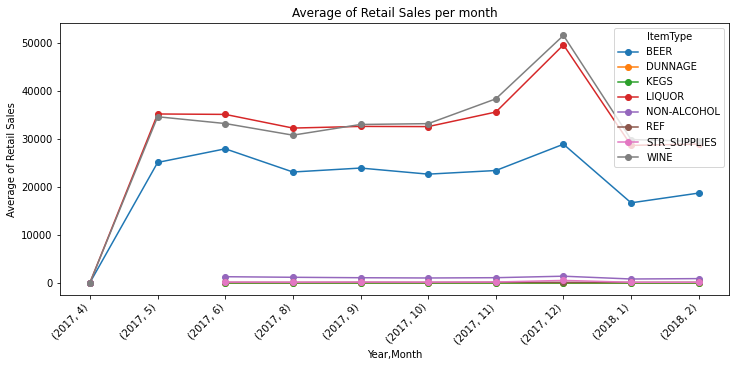

In [290]:
data_monthYear.plot(kind='line', marker='o',figsize=(12,5))
tickLabel = data_monthYear.index
labelPos = np.arange(len(data_monthYear.index))
plt.xticks(labelPos,tickLabel,rotation=45, horizontalalignment="right")
plt.ylabel("Average of Retail Sales")
plt.title("Average of Retail Sales per month")
plt.show()

## 6. Plot the same information as above but as a bar chart.

In [279]:
data_monthYear.columns

Index(['BEER', 'DUNNAGE', 'KEGS', 'LIQUOR', 'NON-ALCOHOL', 'REF',
       'STR_SUPPLIES', 'WINE'],
      dtype='object', name='ItemType')

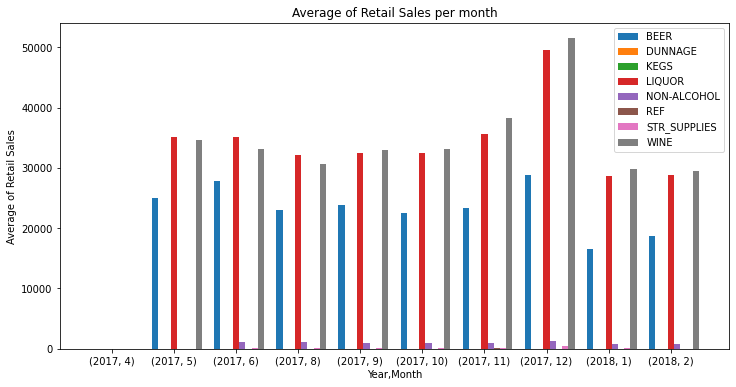

In [287]:
fig, ax = plt.subplots(figsize=(12,6))
x=np.arange(len(data_monthYear.index))
width=0.1
ax.bar(x-width*3,data_monthYear["BEER"],width)
ax.bar(x-width*2,data_monthYear["DUNNAGE"],width)
ax.bar(x-width,data_monthYear['KEGS'],width)
ax.bar(x,data_monthYear['LIQUOR'],width)
ax.bar(x+width,data_monthYear['NON-ALCOHOL'],width)
ax.bar(x+width*2,data_monthYear['REF'],width)
ax.bar(x+width*3,data_monthYear['STR_SUPPLIES'],width)
ax.bar(x+width*4,data_monthYear['WINE'],width)
ax.set_ylabel("Average of Retail Sales")
ax.set_xlabel("Year,Month")
tickLabel = data_monthYear.index
labelPos = np.arange(len(data_monthYear.index))
plt.xticks(labelPos,tickLabel)
ax.legend(list(data_monthYear.columns))
plt.title("Average of Retail Sales per month")
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

In [60]:
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


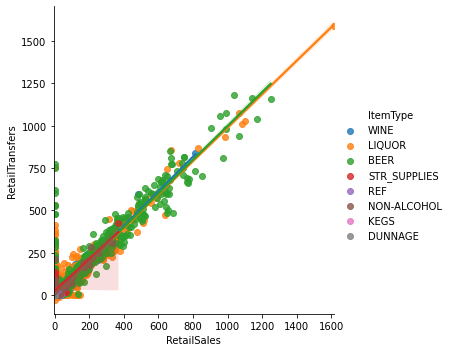

In [64]:
sns.lmplot(x="RetailSales", y="RetailTransfers", data=data, hue="ItemType")

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

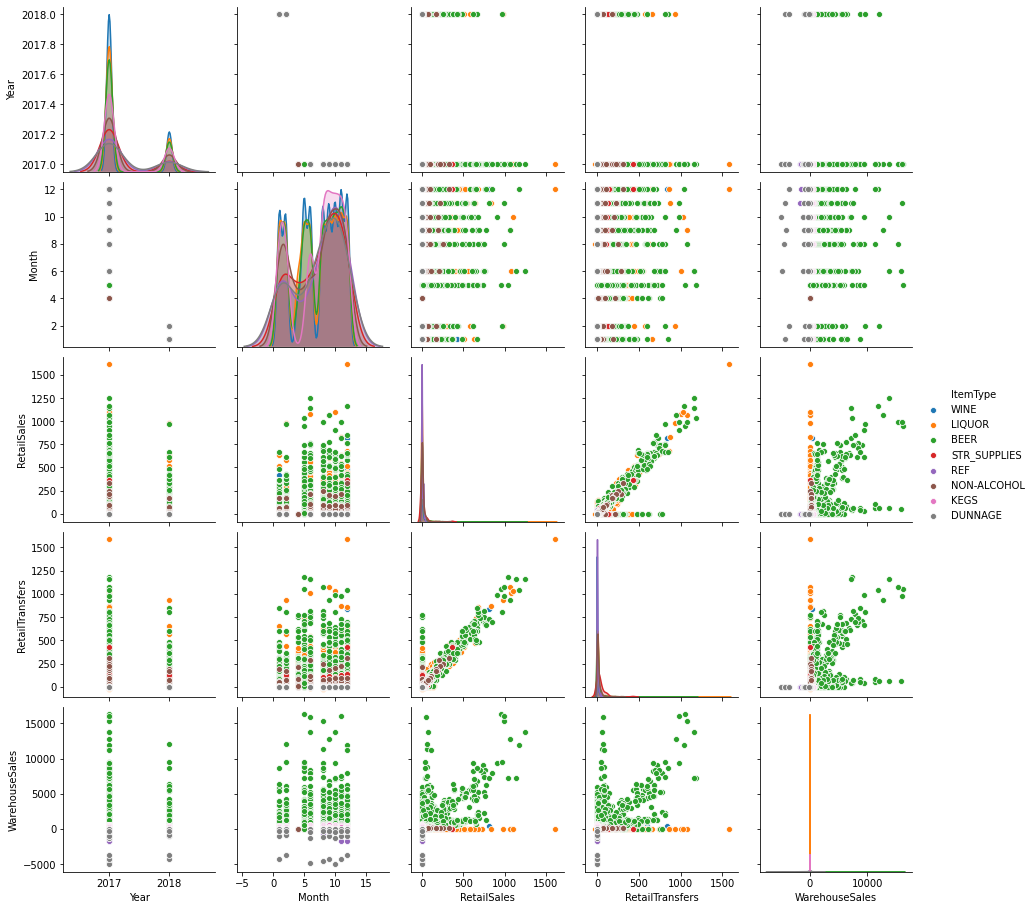

In [75]:
sns.pairplot(data=data, hue="ItemType")